In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 9

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2009.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2009-10-01 01:00:00,NaN,0.27,NaN,NaN,NaN,39.889999,48.150002,NaN,50.680000,18.260000,NaN,NaN,5.55,NaN,NaN,28079003
1,2009-10-01 01:00:00,NaN,0.22,NaN,NaN,NaN,21.230000,24.260000,NaN,55.880001,10.580000,NaN,NaN,8.84,NaN,NaN,28079004
2,2009-10-01 01:00:00,NaN,0.18,NaN,NaN,NaN,31.230000,34.880001,NaN,49.060001,25.190001,NaN,NaN,6.98,NaN,NaN,28079039
3,2009-10-01 01:00:00,0.95,0.33,1.43,2.68,0.25,55.180000,81.360001,1.57,36.669998,26.530001,6.82,1.30,8.88,1.38,4.62,28079006
4,2009-10-01 01:00:00,NaN,0.41,NaN,NaN,0.12,61.349998,76.260002,NaN,38.090000,23.760000,NaN,NaN,7.82,1.41,NaN,28079007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215683,2009-06-01 00:00:00,0.50,0.22,0.39,0.75,0.09,22.000000,24.510000,1.00,82.239998,10.830000,7.15,0.74,6.25,1.25,0.69,28079024
215684,2009-06-01 00:00:00,NaN,0.31,NaN,NaN,NaN,76.110001,101.099998,NaN,41.220001,9.920000,NaN,NaN,4.90,NaN,NaN,28079025
215685,2009-06-01 00:00:00,0.13,NaN,0.86,NaN,0.23,81.050003,99.849998,NaN,24.830000,12.460000,6.77,NaN,8.40,1.34,0.13,28079026
215686,2009-06-01 00:00:00,0.21,NaN,2.96,NaN,0.10,72.419998,82.959999,NaN,NaN,13.030000,NaN,NaN,7.84,1.42,1.87,28079027


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2009-10-01 01:00:00,10.00,0.27,10.00,10.00,10.00,39.889999,48.150002,10.00,50.680000,18.260000,10.00,10.00,5.55,10.00,10.00,28079003
1,2009-10-01 01:00:00,10.00,0.22,10.00,10.00,10.00,21.230000,24.260000,10.00,55.880001,10.580000,10.00,10.00,8.84,10.00,10.00,28079004
2,2009-10-01 01:00:00,10.00,0.18,10.00,10.00,10.00,31.230000,34.880001,10.00,49.060001,25.190001,10.00,10.00,6.98,10.00,10.00,28079039
3,2009-10-01 01:00:00,0.95,0.33,1.43,2.68,0.25,55.180000,81.360001,1.57,36.669998,26.530001,6.82,1.30,8.88,1.38,4.62,28079006
4,2009-10-01 01:00:00,10.00,0.41,10.00,10.00,0.12,61.349998,76.260002,10.00,38.090000,23.760000,10.00,10.00,7.82,1.41,10.00,28079007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215683,2009-06-01 00:00:00,0.50,0.22,0.39,0.75,0.09,22.000000,24.510000,1.00,82.239998,10.830000,7.15,0.74,6.25,1.25,0.69,28079024
215684,2009-06-01 00:00:00,10.00,0.31,10.00,10.00,10.00,76.110001,101.099998,10.00,41.220001,9.920000,10.00,10.00,4.90,10.00,10.00,28079025
215685,2009-06-01 00:00:00,0.13,10.00,0.86,10.00,0.23,81.050003,99.849998,10.00,24.830000,12.460000,6.77,10.00,8.40,1.34,0.13,28079026
215686,2009-06-01 00:00:00,0.21,10.00,2.96,10.00,0.10,72.419998,82.959999,10.00,10.000000,13.030000,10.00,10.00,7.84,1.42,1.87,28079027


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215688 entries, 0 to 215687
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     215688 non-null  object 
 1   BEN      215688 non-null  float64
 2   CO       215688 non-null  float64
 3   EBE      215688 non-null  float64
 4   MXY      215688 non-null  float64
 5   NMHC     215688 non-null  float64
 6   NO_2     215688 non-null  float64
 7   NOx      215688 non-null  float64
 8   OXY      215688 non-null  float64
 9   O_3      215688 non-null  float64
 10  PM10     215688 non-null  float64
 11  PM25     215688 non-null  float64
 12  PXY      215688 non-null  float64
 13  SO_2     215688 non-null  float64
 14  TCH      215688 non-null  float64
 15  TOL      215688 non-null  float64
 16  station  215688 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 28.0+ MB


In [5]:
b.describe()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
count,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,215688.000000,2.156880e+05
mean,7.425481,1.502040,7.554473,9.107110,6.605792,54.113870,88.771901,9.004625,42.895985,23.218681,10.725833,8.990370,10.276304,7.023791,8.296883,2.807902e+07
std,4.177475,3.079046,3.992049,2.589946,4.661337,34.924074,83.207791,2.783948,30.627513,19.836064,4.924453,2.821069,5.956737,4.068976,3.793941,1.955060e+01
min,0.100000,0.060000,0.100000,0.240000,0.000000,0.600000,1.200000,0.150000,0.600000,0.750000,0.600000,0.160000,0.600000,0.560000,0.000000,2.807900e+07
25%,1.640000,0.250000,2.560000,10.000000,0.240000,28.080000,36.049999,10.000000,14.340000,10.000000,10.000000,10.000000,6.970000,1.510000,8.970000,2.807901e+07
50%,10.000000,0.350000,10.000000,10.000000,10.000000,47.369999,64.059998,10.000000,38.689999,17.299999,10.000000,10.000000,8.440000,10.000000,10.000000,2.807902e+07
75%,10.000000,0.580000,10.000000,10.000000,10.000000,72.190002,112.300003,10.000000,63.730000,30.500000,10.000000,10.000000,11.370000,10.000000,10.000000,2.807903e+07
max,37.720001,10.000000,81.480003,56.500000,10.000000,477.399994,1438.000000,45.349998,179.100006,286.799988,112.199997,49.299999,128.500000,10.000000,94.830002,2.807910e+07


In [6]:
c=b.head(100)
c

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2009-10-01 01:00:00,10.00,0.27,10.00,10.00,10.00,39.889999,48.150002,10.00,50.680000,18.260000,10.00,10.00,5.55,10.00,10.00,28079003
1,2009-10-01 01:00:00,10.00,0.22,10.00,10.00,10.00,21.230000,24.260000,10.00,55.880001,10.580000,10.00,10.00,8.84,10.00,10.00,28079004
2,2009-10-01 01:00:00,10.00,0.18,10.00,10.00,10.00,31.230000,34.880001,10.00,49.060001,25.190001,10.00,10.00,6.98,10.00,10.00,28079039
3,2009-10-01 01:00:00,0.95,0.33,1.43,2.68,0.25,55.180000,81.360001,1.57,36.669998,26.530001,6.82,1.30,8.88,1.38,4.62,28079006
4,2009-10-01 01:00:00,10.00,0.41,10.00,10.00,0.12,61.349998,76.260002,10.00,38.090000,23.760000,10.00,10.00,7.82,1.41,10.00,28079007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2009-10-01 04:00:00,0.43,0.27,0.50,1.29,0.00,17.299999,20.010000,1.00,47.299999,11.020000,7.29,0.92,6.37,1.21,1.40,28079024
96,2009-10-01 04:00:00,10.00,0.24,10.00,10.00,10.00,44.419998,48.680000,10.00,27.120001,18.280001,10.00,10.00,12.11,10.00,10.00,28079025
97,2009-10-01 04:00:00,0.35,10.00,0.31,10.00,0.34,68.220001,91.970001,10.00,5.870000,9.590000,10.80,10.00,8.02,2.42,2.35,28079026
98,2009-10-01 04:00:00,2.19,10.00,3.23,10.00,0.26,69.720001,85.129997,10.00,10.000000,21.959999,10.00,10.00,10.12,1.90,8.42,28079027


In [7]:
c.columns

Index(['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.00,0.27,10.00,10.00,10.00,39.889999,48.150002,10.00,50.680000,18.260000,10.00,5.55,10.00,10.00,28079003
1,10.00,0.22,10.00,10.00,10.00,21.230000,24.260000,10.00,55.880001,10.580000,10.00,8.84,10.00,10.00,28079004
2,10.00,0.18,10.00,10.00,10.00,31.230000,34.880001,10.00,49.060001,25.190001,10.00,6.98,10.00,10.00,28079039
3,0.95,0.33,1.43,2.68,0.25,55.180000,81.360001,1.57,36.669998,26.530001,1.30,8.88,1.38,4.62,28079006
4,10.00,0.41,10.00,10.00,0.12,61.349998,76.260002,10.00,38.090000,23.760000,10.00,7.82,1.41,10.00,28079007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.43,0.27,0.50,1.29,0.00,17.299999,20.010000,1.00,47.299999,11.020000,0.92,6.37,1.21,1.40,28079024
96,10.00,0.24,10.00,10.00,10.00,44.419998,48.680000,10.00,27.120001,18.280001,10.00,12.11,10.00,10.00,28079025
97,0.35,10.00,0.31,10.00,0.34,68.220001,91.970001,10.00,5.870000,9.590000,10.00,8.02,2.42,2.35,28079026
98,2.19,10.00,3.23,10.00,0.26,69.720001,85.129997,10.00,10.000000,21.959999,10.00,10.12,1.90,8.42,28079027


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28078973.652836747


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,6.968740
CO,0.067316
EBE,-9.596613
MXY,5.698817
NMHC,-17.072280
NO_2,0.102162
NOx,-0.117350
OXY,356.810183
O_3,-0.147008
PM10,0.088892


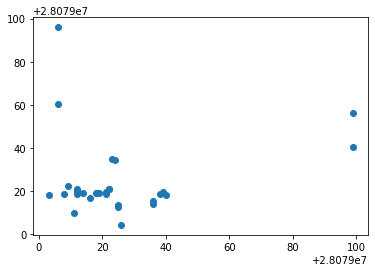

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

-0.3978991832565777


In [16]:
lr.score(x_train,y_train)

0.33792535592107564

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.06207884356847104

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

0.1529748491877434

# LOGISTIC REGRESSION

In [22]:
w=d.iloc[:,0:12]
w1=d.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
b=StandardScaler().fit_transform(w)


In [25]:
from sklearn.model_selection import train_test_split
w_train,w_test,w1_train,w1_test=train_test_split(w,w1,test_size=0.7)

In [26]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [27]:
t=[[12,22,32,42,52,45,32,56,87,34,69,76]]


In [28]:
e=p.predict(t)
print(e)

[28079025]


In [29]:
p.classes_

array([28079003, 28079004, 28079006, 28079007, 28079008, 28079009,
       28079011, 28079012, 28079014, 28079016, 28079017, 28079018,
       28079019, 28079021, 28079022, 28079023, 28079024, 28079025,
       28079026, 28079027, 28079036, 28079038, 28079039, 28079040,
       28079099], dtype=int64)

In [30]:
print(p.score(w_test,w1_test))

0.11428571428571428


In [31]:
p.predict_proba(t)[0][0]

1.5034407333918548e-64

In [32]:
p.predict_proba(t)[0][1]

1.4361932675649735e-39

# ELASTIC NET

In [33]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [34]:
print(p.coef_)

[-0.91364706 -0.         -1.03462222 -0.58443073  0.37940999 -0.
  0.03997503 -0.72640892 -0.09094696  0.0459657  -0.90359837 -0.45840338
  0.53631787  1.22540149]


In [35]:
print(p.intercept_)

28079043.770632464


In [36]:
print(p.predict(x_test))

[28079041.10426123 28079041.66869598 28079020.40734389 28079036.76094534
 28079018.85702054 28079018.8736211  28079017.5952383  28079018.672254
 28079020.06248719 28079020.24159863 28079018.43943741 28079019.52999811
 28079041.57632154 28079017.94602932 28079020.01835589 28079018.79458484
 28079011.08805954 28079030.97193713 28079016.13422772 28079018.49084824
 28079018.30889944 28079042.26751478 28079018.33667254 28079016.54580358
 28079019.04889535 28079019.62087339 28079020.51751933 28079019.98907703
 28079017.87735893 28079019.01578991]


In [37]:
print(p.score(x_test,y_test))

0.15260738915244898


# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
parameters={'max_depth':[1,53,67,53,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[23,45,67,23,56]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 67, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [23, 45, 67, 23, 56]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.34285714285714286

In [42]:
rfc_best=grid_search.best_estimator_

[Text(697.5, 2441.67, 'X[6] <= 20.61\ngini = 0.933\nsamples = 44\nvalue = [2, 1, 2, 4, 1, 1, 4, 1, 4, 9, 4, 4, 1, 0\n3, 1, 7, 2, 1, 2, 0, 7, 3, 5, 1]'),
 Text(348.75, 1997.73, 'gini = 0.37\nsamples = 5\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0\n0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(1046.25, 1997.73, 'X[11] <= 4.9\ngini = 0.928\nsamples = 39\nvalue = [2, 0, 2, 4, 1, 1, 4, 1, 4, 9, 3, 4, 1, 0\n3, 1, 0, 2, 1, 2, 0, 7, 3, 5, 1]'),
 Text(697.5, 1553.79, 'gini = 0.449\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0]'),
 Text(1395.0, 1553.79, 'X[5] <= 33.975\ngini = 0.917\nsamples = 34\nvalue = [2, 0, 2, 4, 1, 0, 4, 0, 4, 9, 3, 4, 1, 0\n3, 1, 0, 2, 1, 2, 0, 7, 3, 0, 1]'),
 Text(697.5, 1109.85, 'X[8] <= 38.1\ngini = 0.878\nsamples = 22\nvalue = [2, 0, 1, 0, 0, 0, 4, 0, 3, 9, 3, 4, 0, 0\n3, 1, 0, 0, 0, 0, 0, 7, 3, 0, 1]'),
 Text(348.75, 665.9099999999999, 'gini = 0.667\nsamples = 5\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0\n

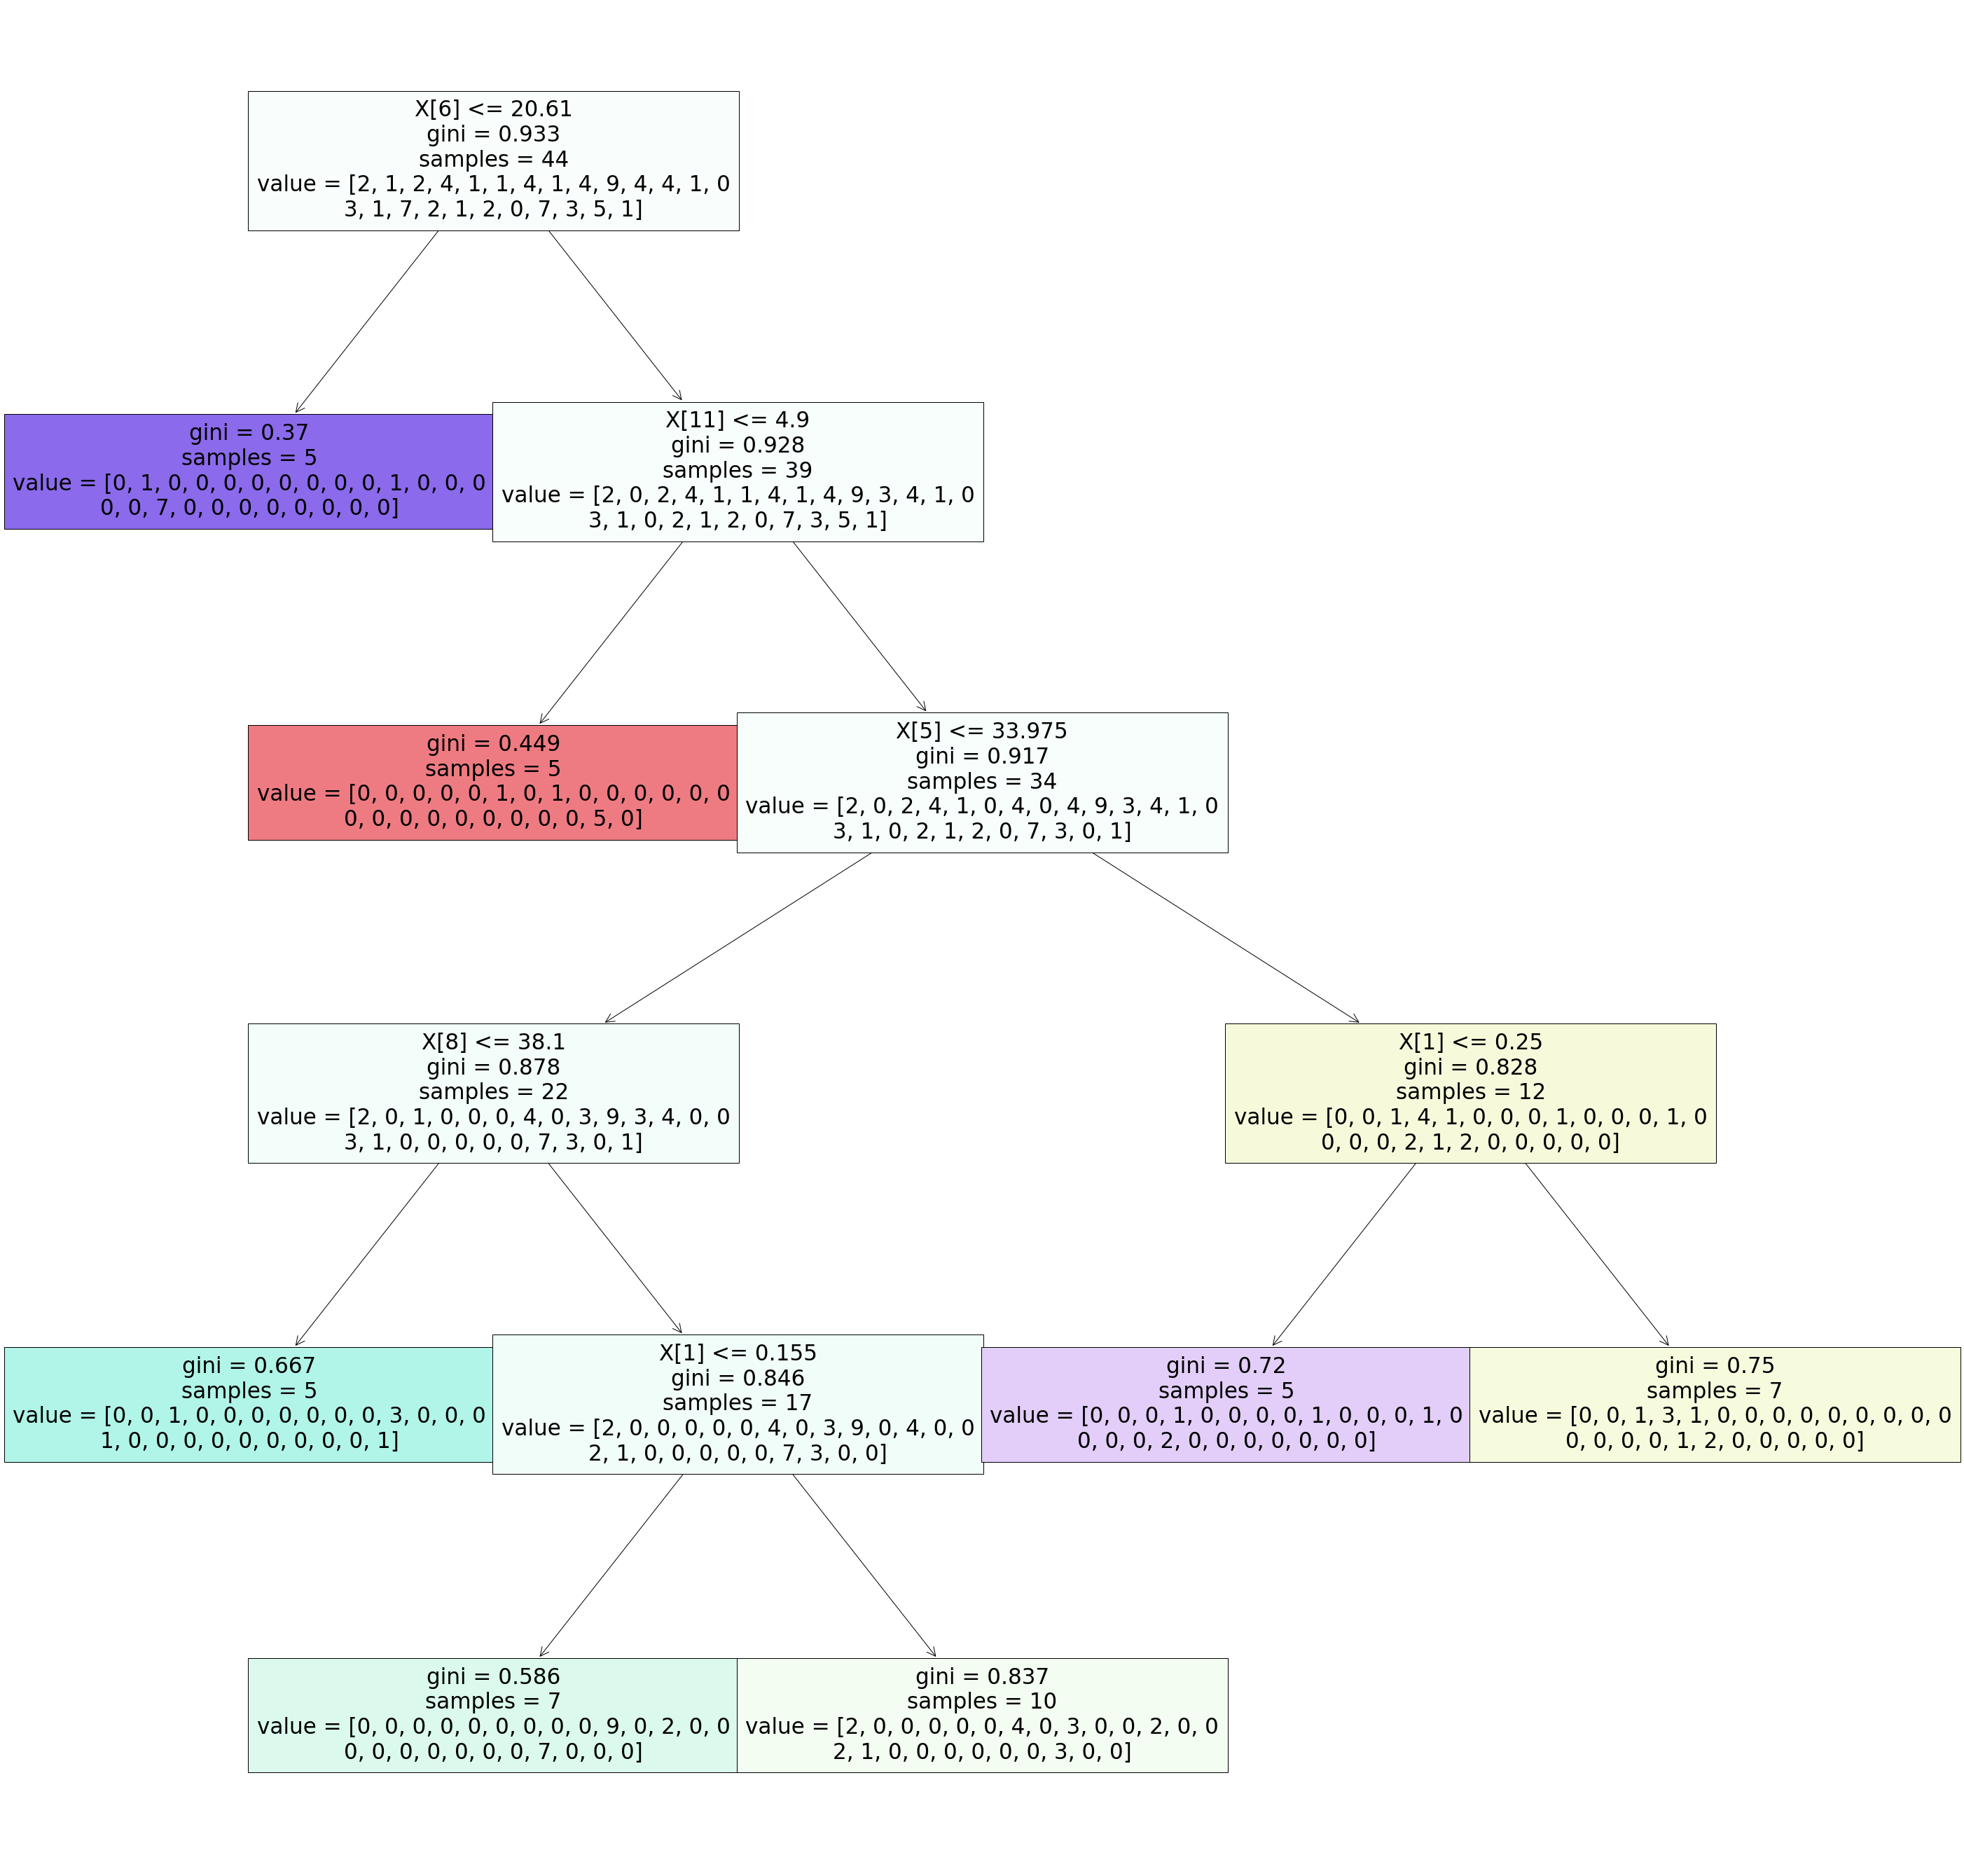

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:Random Forest score=0.34285714285714286 is a Highest accuracy

# DATA SET 10

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2010.csv")
s

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2010-03-01 01:00:00,NaN,0.29,NaN,NaN,NaN,25.090000,29.219999,NaN,68.930000,NaN,NaN,NaN,10.15,NaN,NaN,28079003
1,2010-03-01 01:00:00,NaN,0.27,NaN,NaN,NaN,24.879999,30.040001,NaN,NaN,NaN,NaN,NaN,12.24,NaN,NaN,28079004
2,2010-03-01 01:00:00,NaN,0.28,NaN,NaN,NaN,17.410000,20.540001,NaN,72.120003,NaN,NaN,NaN,NaN,NaN,NaN,28079039
3,2010-03-01 01:00:00,0.38,0.24,1.74,NaN,0.05,15.610000,21.080000,NaN,72.970001,19.410000,7.870000,NaN,10.06,1.52,1.49,28079008
4,2010-03-01 01:00:00,0.79,NaN,1.32,NaN,NaN,21.430000,26.070000,NaN,NaN,24.670000,22.030001,NaN,10.68,NaN,2.88,28079038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209443,2010-08-01 00:00:00,NaN,0.55,NaN,NaN,NaN,125.000000,219.899994,NaN,25.379999,NaN,NaN,NaN,NaN,NaN,NaN,28079056
209444,2010-08-01 00:00:00,NaN,0.27,NaN,NaN,NaN,45.709999,47.410000,NaN,NaN,51.259998,NaN,NaN,7.26,NaN,NaN,28079057
209445,2010-08-01 00:00:00,NaN,NaN,NaN,NaN,0.24,46.560001,49.040001,NaN,46.250000,NaN,NaN,NaN,NaN,1.47,NaN,28079058
209446,2010-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,46.770000,50.119999,NaN,77.709999,NaN,NaN,NaN,NaN,NaN,NaN,28079059


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2010-03-01 01:00:00,4.00,0.29,4.00,4.0,4.00,25.090000,29.219999,4.0,68.930000,4.000000,4.000000,4.0,10.15,4.00,4.00,28079003
1,2010-03-01 01:00:00,4.00,0.27,4.00,4.0,4.00,24.879999,30.040001,4.0,4.000000,4.000000,4.000000,4.0,12.24,4.00,4.00,28079004
2,2010-03-01 01:00:00,4.00,0.28,4.00,4.0,4.00,17.410000,20.540001,4.0,72.120003,4.000000,4.000000,4.0,4.00,4.00,4.00,28079039
3,2010-03-01 01:00:00,0.38,0.24,1.74,4.0,0.05,15.610000,21.080000,4.0,72.970001,19.410000,7.870000,4.0,10.06,1.52,1.49,28079008
4,2010-03-01 01:00:00,0.79,4.00,1.32,4.0,4.00,21.430000,26.070000,4.0,4.000000,24.670000,22.030001,4.0,10.68,4.00,2.88,28079038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209443,2010-08-01 00:00:00,4.00,0.55,4.00,4.0,4.00,125.000000,219.899994,4.0,25.379999,4.000000,4.000000,4.0,4.00,4.00,4.00,28079056
209444,2010-08-01 00:00:00,4.00,0.27,4.00,4.0,4.00,45.709999,47.410000,4.0,4.000000,51.259998,4.000000,4.0,7.26,4.00,4.00,28079057
209445,2010-08-01 00:00:00,4.00,4.00,4.00,4.0,0.24,46.560001,49.040001,4.0,46.250000,4.000000,4.000000,4.0,4.00,1.47,4.00,28079058
209446,2010-08-01 00:00:00,4.00,4.00,4.00,4.0,4.00,46.770000,50.119999,4.0,77.709999,4.000000,4.000000,4.0,4.00,4.00,4.00,28079059


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209448 entries, 0 to 209447
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     209448 non-null  object 
 1   BEN      209448 non-null  float64
 2   CO       209448 non-null  float64
 3   EBE      209448 non-null  float64
 4   MXY      209448 non-null  float64
 5   NMHC     209448 non-null  float64
 6   NO_2     209448 non-null  float64
 7   NOx      209448 non-null  float64
 8   OXY      209448 non-null  float64
 9   O_3      209448 non-null  float64
 10  PM10     209448 non-null  float64
 11  PM25     209448 non-null  float64
 12  PXY      209448 non-null  float64
 13  SO_2     209448 non-null  float64
 14  TCH      209448 non-null  float64
 15  TOL      209448 non-null  float64
 16  station  209448 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 27.2+ MB


In [47]:
s2=s1.head(100)
s2

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2010-03-01 01:00:00,4.00,0.29,4.00,4.0,4.00,25.090000,29.219999,4.0,68.930000,4.00,4.000000,4.0,10.15,4.00,4.00,28079003
1,2010-03-01 01:00:00,4.00,0.27,4.00,4.0,4.00,24.879999,30.040001,4.0,4.000000,4.00,4.000000,4.0,12.24,4.00,4.00,28079004
2,2010-03-01 01:00:00,4.00,0.28,4.00,4.0,4.00,17.410000,20.540001,4.0,72.120003,4.00,4.000000,4.0,4.00,4.00,4.00,28079039
3,2010-03-01 01:00:00,0.38,0.24,1.74,4.0,0.05,15.610000,21.080000,4.0,72.970001,19.41,7.870000,4.0,10.06,1.52,1.49,28079008
4,2010-03-01 01:00:00,0.79,4.00,1.32,4.0,4.00,21.430000,26.070000,4.0,4.000000,24.67,22.030001,4.0,10.68,4.00,2.88,28079038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2010-03-01 04:00:00,0.28,0.19,0.94,1.0,0.17,6.880000,10.410000,1.0,79.239998,4.24,3.760000,1.0,8.39,1.43,0.65,28079099
96,2010-03-01 05:00:00,4.00,0.22,4.00,4.0,4.00,9.180000,11.480000,4.0,83.559998,4.00,4.000000,4.0,8.80,4.00,4.00,28079003
97,2010-03-01 05:00:00,4.00,0.20,4.00,4.0,4.00,7.030000,10.100000,4.0,4.000000,4.00,4.000000,4.0,10.89,4.00,4.00,28079004
98,2010-03-01 05:00:00,4.00,0.23,4.00,4.0,4.00,5.780000,8.730000,4.0,81.330002,4.00,4.000000,4.0,4.00,4.00,4.00,28079039


In [48]:
#linear
x=s2.iloc[:,1:10]
y=s2.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(lr.intercept_)

28079064.467133563


In [52]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-4.342696
CO,5.667038
EBE,8.309559
MXY,-17.847272
NMHC,0.658222
NO_2,-1.193542
NOx,0.545538
OXY,3.956182
O_3,0.068356


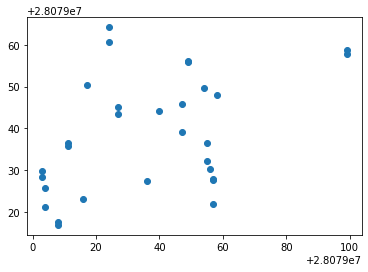

In [53]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [54]:
print(lr.score(x_test,y_test))

0.1773317077132952


In [55]:
lr.score(x_train,y_train)

0.3895431208071075

In [56]:
#lasso
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [57]:
la.score(x_test,y_test)

0.009858930447315006

In [58]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [59]:
rr.score(x_test,y_test)

0.17492532770303337

In [60]:
#logistic
b=StandardScaler().fit_transform(x)


In [61]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

LogisticRegression(max_iter=10000)

In [62]:
t=[[12,22,32,42,52,45,32,90,75]]

In [63]:
e=p.predict(t)
print(e)

[28079054]


In [64]:
p.classes_

array([28079003, 28079004, 28079008, 28079011, 28079016, 28079017,
       28079018, 28079024, 28079027, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079049, 28079050, 28079054, 28079055,
       28079056, 28079057, 28079058, 28079059, 28079060, 28079099],
      dtype=int64)

In [65]:
print(p.score(x_test,y_test))

0.9333333333333333


In [66]:
p.predict_proba(t)[0][0]

2.8055477318297162e-11

In [67]:
p.predict_proba(t)[0][1]

6.758163213289794e-38

In [68]:
#elastic
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [69]:
print(p.coef_)

[ 1.04498212  3.95386998  1.03362578 -3.30673567 -0.66515917 -0.84312681
  0.10365423 -3.09315268  0.05457016]


In [70]:
print(p.intercept_)

28079054.14993515


In [71]:
print(p.predict(x_test))

[28079033.57775991 28079035.645595   28079026.35398667 28079025.39836846
 28079038.80664095 28079031.64965967 28079043.74364551 28079047.86462005
 28079033.28626176 28079052.67549214 28079049.98210749 28079034.42945246
 28079046.58576875 28079042.33349862 28079023.38884118 28079047.53420997
 28079026.88572557 28079051.9224141  28079041.57205195 28079033.00408665
 28079036.62651153 28079041.6217569  28079033.08395683 28079036.73027698
 28079044.18364409 28079052.49449142 28079023.85793309 28079028.24315539
 28079052.81061301 28079030.04906251]


In [72]:
print(p.score(x_test,y_test))

0.14133549921649258


In [73]:
#randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
parameters={'max_depth':[1,53,75,3,57],
  'min_samples_leaf':[5,34,6,65,45],
           'n_estimators':[3,13,7,23,56]}

In [75]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 75, 3, 57],
                         'min_samples_leaf': [5, 34, 6, 65, 45],
                         'n_estimators': [3, 13, 7, 23, 56]},
             scoring='accuracy')

In [76]:
grid_search.best_score_

0.34285714285714286

In [77]:
rfc_best=grid_search.best_estimator_

[Text(1550.0, 2330.685, 'X[8] <= 72.96\ngini = 0.941\nsamples = 46\nvalue = [5, 2, 4, 1, 1, 6, 5, 3, 2, 4, 2, 1, 3, 1\n0, 6, 1, 2, 5, 0, 2, 5, 5, 4]'),
 Text(930.0, 1664.7749999999999, 'X[8] <= 39.425\ngini = 0.89\nsamples = 25\nvalue = [0, 2, 0, 1, 1, 6, 0, 0, 2, 4, 2, 1, 3, 1\n0, 6, 0, 2, 0, 0, 0, 0, 5, 0]'),
 Text(620.0, 998.865, 'X[6] <= 22.365\ngini = 0.851\nsamples = 17\nvalue = [0, 2, 0, 1, 0, 0, 0, 0, 2, 4, 2, 0, 3, 1\n0, 6, 0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(310.0, 332.9549999999999, 'gini = 0.781\nsamples = 11\nvalue = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 1\n0, 6, 0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(930.0, 332.9549999999999, 'gini = 0.571\nsamples = 6\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(1240.0, 998.865, 'gini = 0.627\nsamples = 8\nvalue = [0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 1, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 5, 0]'),
 Text(2170.0, 1664.7749999999999, 'X[1] <= 0.225\ngini = 0.874\nsamples = 21\nvalue = [5, 0, 4, 0, 0, 0, 5, 3, 0

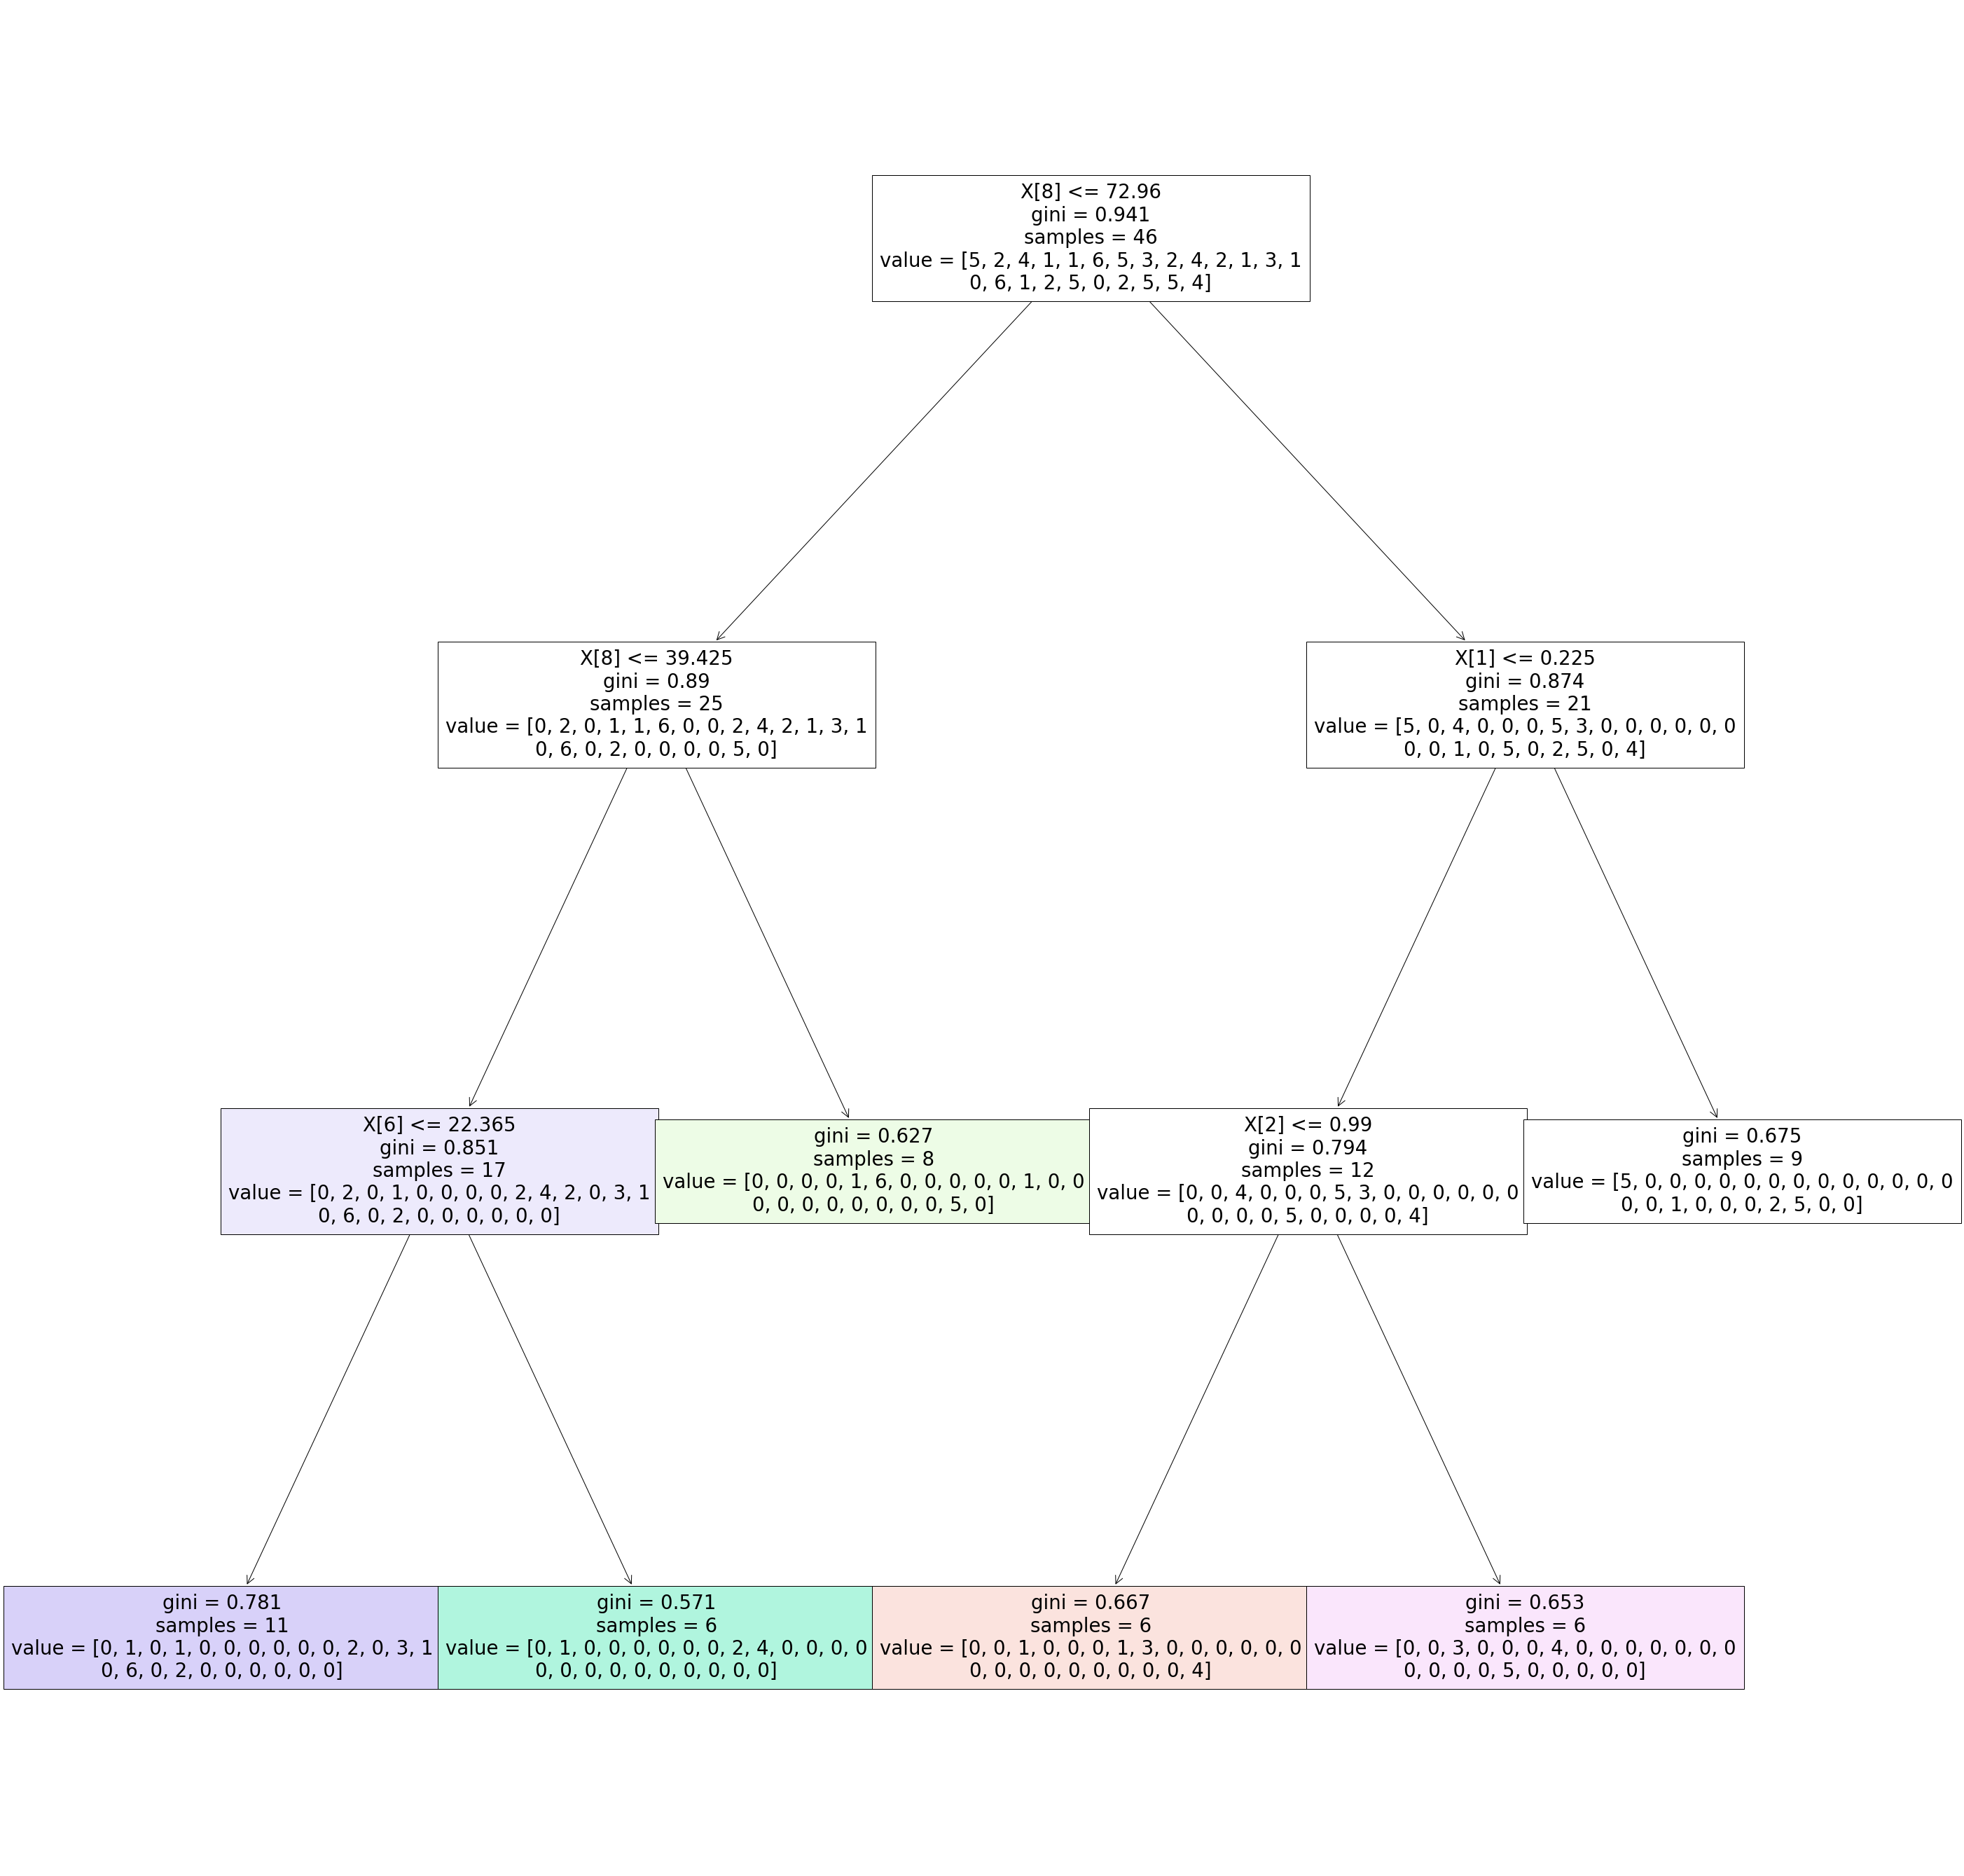

In [78]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:LOGISTIC SCORE=0.9333333333333333 is a Highest accuracy